# Twitter Sentiment Analysis (NLP)

---
Description: This project focuses on the analysis of sentiment of the tweet using popular machine learning algorithm: Naive-Bayes (Gaussian).

Key Features:

*   ML model trained with the SMOTE technique to address class imbalance.
*   Evaluation of model accuracies through confusion matrix.

Details:
In this project, our objective is to develop accurate models for sentiment analysis of tweets by leveraging the power of the Naive-Bayes (Gaussian) algorithm. Class imbalance is a common challenge in Natural Language Processing. To address this challenge, we have employed the SMOTE (Synthetic Minority Over-sampling Technique) method, which allows us to train a model that takes class imbalance into serious consideration.

To assess the performance of our trained models, we employ the widely-used confusion matrix. This evaluation metric provides valuable insights into the classification accuracy by analyzing true positives, true negatives, false positives, and false negatives.

Through this project, our aim is to contribute valuable insights to the analysis of sentiment, harnessing the strength of the Naive-Bayes (Gaussian) algorithm. Our findings will enhance our understanding of the effectiveness of these algorithms, underscore the significance of employing SMOTE for addressing class imbalance, and help us maintain the standards of the Twitter community.

1.   List item
2.   List item




**Importing the libraries**

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

**Importing the dataset**

In [2]:
dataset_train=pd.read_csv('train.csv',delimiter=',')
dataset_test=pd.read_csv('test.csv',delimiter=',')
X_train = dataset_train.iloc[:,-1]
y_train = dataset_train.iloc[:,1]
print(X_train)
print(y_train)

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object
0        0
1        0
2        0
3        0
4        0
        ..
31957    0
31958    0
31959    0
31960    1
31961    0
Name: label, Length: 31962, dtype: int64


**Creating profile report**

In [3]:
!pip install pandas-profiling[notebook]
from pandas_profiling import ProfileReport
prof_report = ProfileReport(dataset_train)
prof_report

<ipython-input-3-bdc434dfc92f>:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Plotting the Bar Graph to analyse readings**

In [4]:
count=0 #initializing the count with 0
for i in range(len(y_train)): # for loop to count number of normal readings
  if(y_train[i]==1):
    count=count+1
print("The data distribution in the given dataset: \n \nConcerning:", (count/(len(y_train)))*100,"%")
print("Normal:", ((len(y_train)-count)/(len(y_train))*100),"%") # shocking/alerting reading = total_readings - normal_readings

The data distribution in the given dataset: 
 
Concerning: 7.014579813528565 %
Normal: 92.98542018647143 %


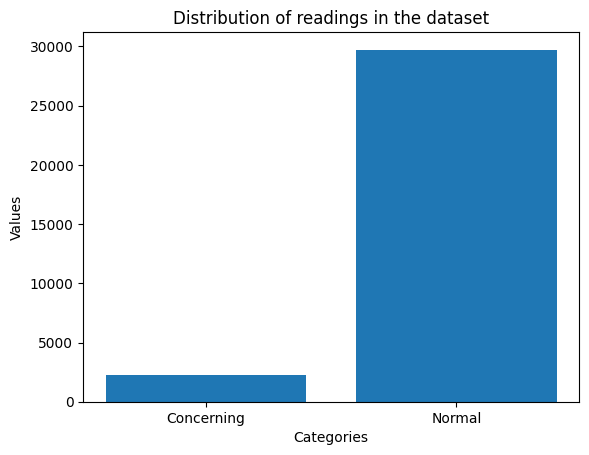

In [5]:
categories = ['Concerning', 'Normal']
values = [count, len(y_train)-count]

plt.bar(categories, values)

plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Distribution of readings in the dataset')

plt.show()

*We can clearly see that there is class imbalance and this should be treated using SMOTE. We will treat this class imbalace after cleaning the text*

**Cleaning the text**

In [6]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
corpus_train=[]
for i in range(0,31962):
  review = re.sub('[^a-zA-Z]',' ',dataset_train['tweet'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  allstopwords =stopwords.words('english')
  allstopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(allstopwords)]
  review = ' '.join(review)
  corpus_train.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Feature extraction**

In [7]:
print(corpus_train)

['user father dysfunct selfish drag kid dysfunct run', 'user user thank lyft credit use caus offer wheelchair van pdx disapoint getthank', 'bihday majesti', 'model love u take u time ur', 'factsguid societi motiv', 'huge fan fare big talk leav chao pay disput get allshowandnogo', 'user camp tomorrow user user user user user user user danni', 'next school year year exam think school exam hate imagin actorslif revolutionschool girl', 'love land allin cav champion cleveland clevelandcavali', 'user user welcom gr', 'ireland consum price index mom climb previou may blog silver gold forex', 'selfish orlando standwithorlando pulseshoot orlandoshoot biggerproblem selfish heabreak valu love', 'get see daddi today day gettingf', 'user cnn call michigan middl school build wall chant tcot', 'comment australia opkillingbay seashepherd helpcovedolphin thecov helpcovedolphin', 'ouch junior angri got junior yugyoem omg', 'thank paner thank posit', 'retweet agre', 'friday smile around via ig user user 

In [8]:
from nltk.translate.chrf_score import corpus_chrf
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 5000)
X = cv.fit_transform(corpus_train).toarray()
y = dataset_train.iloc[:,1].values

In [9]:
len(X[0]) #total tokenized words (only rel. words)

5000

In [10]:
print(X)
print(y)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[0 0 0 ... 0 1 0]


**Splitting the dataset into Training and Testing**

In [11]:
from sklearn.model_selection import train_test_split
X1,X2,y1,y2 = train_test_split(X,y,test_size=0.2, random_state = 0)

**Applying SMOTE to balance the data**

In [12]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X1, y1)

In [13]:
from collections import Counter
Counter(y_resampled) #the data has been balanced as shown in the output

Counter({0: 23735, 1: 23735})

**Preprocessing the test set**

In [14]:
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
corpus_test=[]
for i in range(0,17197):
  review_test = re.sub('[^a-zA-Z]',' ',dataset_test['tweet'][i])
  review_test = review_test.lower()
  review_test = review_test.split()
  ps = PorterStemmer()
  allstopwords = stopwords.words('english')
  allstopwords.remove('not')
  review_test = [ps.stem(word) for word in review_test if not word in set(allstopwords)]
  review_test = ' '.join(review_test)
  corpus_train.append(review_test)

**Training the model**

In [15]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_resampled,y_resampled)

GaussianNB()

Predictions

In [16]:
y_pred=classifier.predict(X2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y2.reshape(len(y2),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 1]
 [0 0]]


Creating a Confusion Matrix

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y2,y_pred)
print(cm)
accuracy_score(y2,y_pred)

[[4847 1138]
 [ 139  269]]


0.8002502737368997

We tested our model on real-world data obtained from a test dataset (test.csv). This dataset lacks a label column for testing the model, so we simply applied our trained model to make predictions on it.

In [19]:
corpus_testCV=[]
for i in range(0,17197):
  review_testCV = re.sub('[^a-zA-Z]',' ',dataset_test['tweet'][i])
  review_testCV = review_testCV.lower()
  review_testCV = review_testCV.split()
  review_testCV = [ps.stem(word2) for word2 in review_testCV if not word2 in set(allstopwords)]
  review_testCV = ' '.join(review_testCV)
  corpus_testCV.append(review_testCV)


In [20]:
print(corpus_testCV)

['studiolif aislif requir passion dedic willpow find newmateri', 'user white supremacist want everyon see new bird movi', 'safe way heal acn altwaystoh healthi heal', 'hp curs child book reserv alreadi ye harrypott pottermor favorit', 'rd bihday amaz hilari nephew eli ahmir uncl dave love miss', 'choos momtip', 'someth insid die eye ness smokeyey tire lone sof grung', 'finish tattoo ink ink loveit thank aleee', 'user user user never understand dad left young deep inthefeel', 'delici food lovelif capetown mannaepicur restur', 'dayswast narcosi infinit ep make awar grind neuro bass lifestyl', 'one world greatest spo event leman teamaudi', 'half way websit allgoingwel', 'good food good life enjoy call garlic bread iloveit', 'stand behind guncontrolpleas senselessshoot takethegun comicrelief stillsad', 'ate ate ate jamaisasthi fish curri prawn hilsa foodfestiv foodi', 'user got user limit edit rain shine set today user user user user', 'amp love amp hug amp kiss keep babi parent healthcar'

In [21]:
X_testCV = cv.fit_transform(corpus_testCV).toarray()
y_testCV = dataset_test.iloc[:,1].values

Prediction Results

In [22]:
y_pred = classifier.predict(X_testCV)
print(y_pred) #.reshape(1,-1)

[0 0 0 ... 0 0 0]
